In [11]:
!pip install --upgrade pip > /dev/null
!pip install scikit-image==0.14.2
!pip install opencv-python==3.4.0.12

In [0]:
import cv2

from skimage.color import rgb2gray
from skimage.transform import resize

import matplotlib.pyplot as plt
import math

In [3]:
# Check is Link to Drive is OK
google = !if [ -d 'GDrive/' ]; then echo "1" ; else echo "0"; fi
if (google[0] is '0' ):
  from google.colab import drive
  drive.mount('/content/GDrive/')
!if [ -d 'GDrive/' ]; then echo "Connection to Google drive successful" ; else echo "Error to connect to Google drive"; fi

Connection to Google drive successful


In [0]:
# Make a temporarty directory in Google colab
!mkdir -p /content/CarCrashDetection/Sources/frames > /dev/null

# Recomended to download and copy mp4 video in your Google Drive.
# Directory tree structure in Google drive
#      / ──┐
#          └─ /CarCrashDetection ──┐
#                                  ├─ videofile
#                                  └─ /frames 

# copy video stored in Google Drive /CarCrashDetection/Sources/   to Colab
!cp GDrive/My\ Drive/CarCrashDetection/Sources/*.mp4 CarCrashDetection/Sources/

In [7]:
INPUT_VIDEOS_PATH = '/content/CarCrashDetection/Sources'              # Path to folder with videos 
OUTPUT_FRAMES_PATH = '/content/CarCrashDetection/Sources/frames'      # Location of extracted images

frame_name = 'frame'                                                  # Frame name       
one_frame_each = 4                                                    # Extract one frame each 70

!if [ -d {OUTPUT_FRAMES_PATH} ]; then echo "Output to be stored in "{OUTPUT_FRAMES_PATH} ; else mkdir {OUTPUT_FRAMES_PATH} && echo "Output directory created"; fi

files = !ls {INPUT_VIDEOS_PATH}/*.mp4                                 # Video file names in INPUT VIDEOS PATH
videofile = files[0]                                                  # Refactor of variable 'files' to convert the first video of list

Output to be stored in /content/CarCrashDetection/Sources/frames


In [0]:
count = 0
success = True

vidcap = cv2.VideoCapture(videofile)

while success:
    if (count%one_frame_each == 0):                                   # checks frame number and keeps one_frame_each          
        success,image = vidcap.read()                                 # reads next frame           
        image_gray = rgb2gray(image)                                  # grayscale image
        if image.shape[1]>640:                                        # if image width > 640, resize it
          tmp = resize(image_gray, (math.floor(640 / image_gray.shape[1] * image_gray.shape[0]), 640),mode='constant')
        plt.imsave("%s/%s%d.png" % (OUTPUT_FRAMES_PATH,frame_name, count), tmp, cmap= plt.cm.gray) # saves images to frame folder
        print ('*', end="")
    else:
        success,image = vidcap.read()                                 # reads next frame
    count += 1                                                        # loops counter

In [0]:
!cp CarCrashDetection/Sources/frames/* GDrive/My\ Drive/CarCrashDetection/Sources/frames

In [0]:
!ls GDrive/My\ Drive/CarCrashDetection/Sources/frames

In [0]:
import random                           # Generates random numbers
import os                               # Create directories, list files

from shutil import copyfile             # Copy files from Source to Destination

import cv2                              # To flip images in data augmentation
import matplotlib.pyplot as plt         # To save the images
import matplotlib.image as mpimg

In [5]:
!if [ -d 'GDrive/My Drive/CarCrashDetection/Dataset/train' ]; then echo "Directory train already exist" ; else mkdir 'GDrive/My Drive/CarCrashDetection/Dataset/train' && echo "Directory train created"; fi
!if [ -d 'GDrive/My Drive/CarCrashDetection/Dataset/valid' ]; then echo "Directory valid already exist" ; else mkdir 'GDrive/My Drive/CarCrashDetection/Dataset/valid' && echo "Directory valid created"; fi
!if [ -d 'GDrive/My Drive/CarCrashDetection/Dataset/tmp' ]; then echo "Directory tmp already exist" ; else mkdir 'GDrive/My Drive/CarCrashDetection/Dataset/tmp' && echo "Directory tmp created"; fi
print ("")
print (os.listdir("GDrive/My Drive/CarCrashDetection/Dataset/"))
print ("")
!if [ -d 'GDrive/My Drive/CarCrashDetection/Dataset/train/accident' ]; then echo "Directory accident in train already exist" ; else mkdir 'GDrive/My Drive/CarCrashDetection/Dataset/train/accident' && echo "Directory accident in train created"; fi
!if [ -d 'GDrive/My Drive/CarCrashDetection/Dataset/train/no_accident' ]; then echo "Directory no_accident in train already exist" ; else mkdir 'GDrive/My Drive/CarCrashDetection/Dataset/train/no_accident' && echo "Directory no_accident in train created"; fi
!if [ -d 'GDrive/My Drive/CarCrashDetection/Dataset/valid/accident' ]; then echo "Directory accident in valid already exist" ; else mkdir 'GDrive/My Drive/CarCrashDetection/Dataset/valid/accident' && echo "Directory accident in valid created"; fi
!if [ -d 'GDrive/My Drive/CarCrashDetection/Dataset/valid/no_accident' ]; then echo "Directory no_accident in valid already exist" ; else mkdir 'GDrive/My Drive/CarCrashDetection/Dataset/valid/no_accident' && echo "Directory no_accident in valid created"; fi
print ("")
print ("Deleting folder content train accident")
!rm GDrive/My\ Drive/CarCrashDetection/Dataset/train/accident/* > /dev/null
print ("Deleting folder content train no_accident")
!rm GDrive/My\ Drive/CarCrashDetection/Dataset/train/no_accident/* > /dev/null
print ("Deleting folder content valid accident")
!rm GDrive/My\ Drive/CarCrashDetection/Dataset/valid/accident/* > /dev/null
print ("Deleting folder content valid no_accident")
!rm GDrive/My\ Drive/CarCrashDetection/Dataset/valid/no_accident/* > /dev/null

Directory train already exist
Directory valid already exist
Directory tmp already exist

['tmp', 'train', 'valid', 'models']

Directory accident in train already exist
Directory no_accident in train already exist
Directory accident in valid already exist
Directory no_accident in valid already exist

Deleting folder content train accident
Deleting folder content train no_accident
Deleting folder content valid accident
Deleting folder content valid no_accident


In [6]:
PATH = 'GDrive/My\ Drive/CarCrashDetection/Sources/frames'
filenames_accident = os.listdir ("GDrive/My Drive/CarCrashDetection/Sources/frames/accident")

print (os.listdir('GDrive/My Drive/CarCrashDetection/Sources/frames'))
num_accident = len(filenames_accident)

filenames_no_accident = os.listdir ("GDrive/My Drive/CarCrashDetection/Sources/frames/no_accident")
num_no_accident = len(filenames_no_accident)

print ("Total images with accident ", num_accident)
print ("Total images without accident ", num_no_accident)

['no_accident', 'accident']
Total images with accident  0
Total images without accident  0


In [7]:
data_augmentation = 0

if (data_augmentation == 1):
 
    PATH_accident = PATH + "/accident/"
    remove = PATH_accident+"_flip_*"  
    print("Deleting old mirrored images")
    !rm {remove}

    print("Creating new mirrored images")
    for fn in filenames_accident:
        img = mpimg.imread(PATH_accident+fn)
        rimg= cv2.flip(img,1)
        plt.imsave("%s%s%s.png" % (PATH_accident,"_flip_", fn[:-4]), rimg) # saves images to frame folder

PATH = 'GDrive/My\ Drive/CarCrashDetection/Sources/frames'
filenames_accident = os.listdir ("GDrive/My Drive/CarCrashDetection/Sources/frames/accident")

print (os.listdir('GDrive/My Drive/CarCrashDetection/Sources/frames'))
num_accident = len(filenames_accident)
filenames_no_accident = os.listdir ("GDrive/My Drive/CarCrashDetection/Sources/frames/no_accident")
num_no_accident = len(filenames_no_accident)

print ("Total images with accident ", num_accident)
print ("Total images without accident ", num_no_accident)

['no_accident', 'accident']
Total images with accident  0
Total images without accident  0


In [0]:
percentage_of_train = 0.8    # 80% = 0.8

def split_dataset_in_train_and_valid( filenames, percentage):
  
    total_images = len(filenames)
    total_train = int(total_images * percentage_of_train)
  
    set_train = []
  
    while (len(set_train) != total_train):     
        num_image = random.randrange(total_images)
        if num_image not in set_train:
            set_train.append(num_image)

    set_valid = []
    for i in range(total_images):
        if i not in set_train:
            set_valid.append(i)

    images_train =[]
    for i in set_train:    
        images_train.append(filenames[i])

    images_valid =[]
    for i in set_valid:    
        images_valid.append(filenames[i])

    return (images_train, images_valid)

In [0]:
accident_train_valid = (split_dataset_in_train_and_valid (filenames_accident , percentage_of_train))
no_accident_train_valid = (split_dataset_in_train_and_valid (filenames_no_accident , percentage_of_train))

In [10]:
## Copy files from sources to train
PATH2 = "GDrive/My\ Drive/CarCrashDetection/Dataset/"

## copy accident train set
print ("Copying accident train")
lenght = len (accident_train_valid[0])
for i in range(lenght):
  src = ("GDrive/My Drive/CarCrashDetection/Sources/frames/accident/" + accident_train_valid[0][i])
  dst = ("GDrive/My Drive/CarCrashDetection/Dataset/train/accident/" + accident_train_valid[0][i])
  copyfile(src, dst)
  
train_accident = !ls {PATH2}train/accident
print(f"Number of train images with accident copied: {len(train_accident)}")

## copy accident valid set
print ("Copying accident valid")
lenght = len (accident_train_valid[1])
for i in range(lenght):
  src = ("GDrive/My Drive/CarCrashDetection/Sources/frames/accident/" + accident_train_valid[1][i])
  dst = ("GDrive/My Drive/CarCrashDetection/Dataset/valid/accident/" + accident_train_valid[1][i])
  copyfile(src, dst)
  
valid_accident = !ls {PATH2}valid/accident 
print(f"Number of valid images with accident copied: {len(valid_accident)}")

## copy no_accident train set
print ("Copying no accident train")
lenght = len (no_accident_train_valid[0])
for i in range(lenght):
  src = ("GDrive/My Drive/CarCrashDetection/Sources/frames/no_accident/" + no_accident_train_valid[0][i])
  dst = ("GDrive/My Drive/CarCrashDetection/Dataset/train/no_accident/" + no_accident_train_valid[0][i])
  copyfile(src, dst)

train_no_accident = !ls {PATH2}train/no_accident
print(f"Number of train images with no_accident copied: {len(train_no_accident)}")

## copy accident valid set
print ("Copying no accident valid")
lenght = len (no_accident_train_valid[1])
for i in range(lenght):
  src = ("GDrive/My Drive/CarCrashDetection/Sources/frames/no_accident/" + no_accident_train_valid[1][i])
  dst = ("GDrive/My Drive/CarCrashDetection/Dataset/valid/no_accident/" + no_accident_train_valid[1][i])
  copyfile(src, dst) 
  
valid_no_accident = !ls {PATH2}valid/no_accident
print(f"Number of valid images with no_accident copied: {len(valid_no_accident)}")

Copying accident train
Number of train images with accident copied: 0
Copying accident valid
Number of valid images with accident copied: 0
Copying no accident train
Number of train images with no_accident copied: 0
Copying no accident valid
Number of valid images with no_accident copied: 0


In [11]:
# Check if GPU is available
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found, to activate the GPU go to menu "Runtime" and submenu "Change runtime type", then change hardware accelerator from None to GPU.')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [12]:
!pip install --upgrade pip  > /dev/null
!pip install scipy==1.0.0 > /dev/null
!pip install http://download.pytorch.org/whl/cu75/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl  && pip install torchvision
#!pip install Pillow==4.0.0 > /dev/null
!pip install Pillow==4.1.1 > /dev/null
#!pip install PIL  > /dev/null
!pip install image  > /dev/null
!pip install fastai==0.7.0  > /dev/null
!apt update && apt install -y libsm6 libxext6 > /dev/null

     |████████████████████████████████| 397.4MB 73.8MB/s 
  Found existing installation: torch 0.4.1
    Uninstalling torch-0.4.1:
      Successfully uninstalled torch-0.4.1
ERROR: scikit-image 0.14.2 has requirement pillow>=4.3.0, but you'll have pillow 4.1.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubunt

In [13]:
PATH = "GDrive/My\ Drive/CarCrashDetection/Dataset/"
!if [ -d 'GDrive/My\ Drive/CarCrashDetection/Dataset/models' ]; then echo "Directory models already exist" ; else mkdir '!mkdir mydrive/CarCrashDetection/Dataset/models' && echo "Directory models created"; fi
!ls {PATH}

mkdir: cannot create directory ‘!mkdir mydrive/CarCrashDetection/Dataset/models’: No such file or directory
models	tmp  train  valid


In [16]:
valid_accident = !ls {PATH}valid/accident 
valid_no_accident = !ls {PATH}valid/no_accident

train_accident = !ls {PATH}train/accident
train_no_accident = !ls {PATH}train/no_accident

print(f"Number of valid images with accident: {len(valid_accident)}")
print(f"Number of valid images with no_accident: {len(valid_no_accident)}")
print(f"Number of train images with accident: {len(train_accident)}")
print(f"Number of train images with no_accident: {len(train_no_accident)}")

Number of valid images with accident: 12
Number of valid images with no_accident: 16
Number of train images with accident: 45
Number of train images with no_accident: 64


In [0]:
PATH = "GDrive/My Drive/CarCrashDetection/Dataset/"

# import matplotlib.pyplot as plt

# files = !ls {PATH}valid/no_accident | head
# img = plt.imread(f'{PATH}valid/no_accident/{files[0]}')

# plt.imshow(img);
# img.shape

In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil  > /dev/null
!pip install psutil  > /dev/null
!pip install humanize  > /dev/null

In [0]:
import psutil
import humanize
import os
import GPUtil as GPU

In [29]:
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn't guaranteed
gpu = GPUs[0]

def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print('GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB'.format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 10.8 GB  I Proc size: 2.9 GB
GPU RAM Free: 14286MB | Used: 793MB | Util   5% | Total 15079MB


In [0]:
#@title
# Uncomment the below if you need to reset GPU to recover RAM
# ! pkill python3

In [0]:
# Uncomment the below if you need to reset your precomputed activations
#!rm -rf {PATH}tmp

In [32]:
!{sys.executable} -m pip install torchtext==0.2.3
!pip install torch==0.4.1

In [0]:
# This file contains all the main libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [0]:
arch = resnet34

In [0]:
size = 299

In [0]:
batch_size = 60

In [37]:
data = ImageClassifierData.from_paths("GDrive/My Drive/CarCrashDetection/Dataset/", tfms=tfms_from_model(arch, size), bs=batch_size)
try:
  learn = ConvLearner.pretrained(arch, data, precompute=True)                   # Colab generates a "runtime error due to gpu memory shortage" and pretrain can not finalize
except:
  learn = ConvLearner.pretrained(arch, data, precompute=True)                   # Launched again, it will continue and will finalize pretrain properly

## If error pops up, run again this line again. It's probably due to long processing time required or gpu memory shortage.

/usr/local/lib/python3.6/dist-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)
/usr/local/lib/python3.6/dist-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


In [38]:
epoch = 150
learn.fit(0.001, epoch )

import time
hora = time.strftime("%y%m%d-%H%M")

print ("Size = " + str(size))
print ("Batch size = " + str(batch_size))

model_name = "carCrash" + hora +"_sz"+str(size)+"_bs"+str(batch_size)+"_ep"+str(epoch)

print ("Saving model as:", model_name, ".h5")
learn.save(model_name)
print ("Model saved successfully")

epoch      trn_loss   val_loss   accuracy   
    0      1.022699   0.74055    0.536     
    1      0.931794   0.629844   0.656     
    2      0.859939   0.545773   0.752     
    3      0.812156   0.498643   0.776     
    4      0.759033   0.463325   0.824     
    5      0.713289   0.440015   0.824     
    6      0.669159   0.417763   0.84      
    7      0.641587   0.396691   0.848     
    8      0.625533   0.385599   0.856     
    9      0.60174    0.378764   0.864     
    10     0.5812     0.374308   0.872     
    11     0.555551   0.36444    0.88      
    12     0.541973   0.358454   0.872     
    13     0.520374   0.346514   0.88      
    14     0.505182   0.338367   0.896     
    15     0.485289   0.345049   0.864     
    16     0.477149   0.331608   0.88      
    17     0.466944   0.328011   0.864     
    18     0.4469     0.324105   0.872     
    19     0.442308   0.320925   0.856     
    20     0.429918   0.315936   0.872     
    21     0.426353   0.310332 

In [39]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [40]:
# from here we know that 'accident' is label 0 and 'no_accident' is label 1.
data.classes

['accident', 'no_accident']

In [41]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(125, 2)

In [42]:
log_preds[:10]

array([[-1.15693, -0.37753],
       [-0.01047, -4.56479],
       [-0.08102, -2.55333],
       [-0.44584, -1.02245],
       [-0.10394, -2.31544],
       [-0.00388, -5.55497],
       [-0.16707, -1.87171],
       [-0.06382, -2.78346],
       [-0.33823, -1.24837],
       [-0.00498, -5.30516]], dtype=float32)

In [0]:
import numpy as np

preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(no_accident)

In [0]:
def rand_by_mask(mask): 
    return np.random.choice(np.where(mask)[0], 4, replace=False)

def rand_by_correct(is_correct): 
    return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): 
    return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In [0]:
PATH = "GDrive/My Drive/CarCrashDetection/Dataset/"

In [49]:
!pip install Pillow==5.3.0

Correctly classified


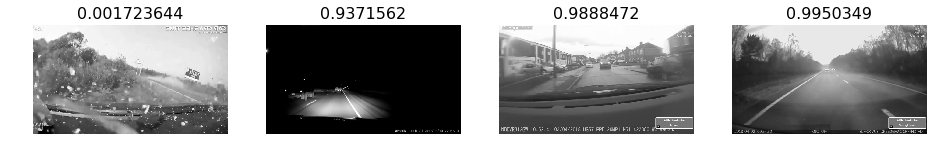

In [50]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


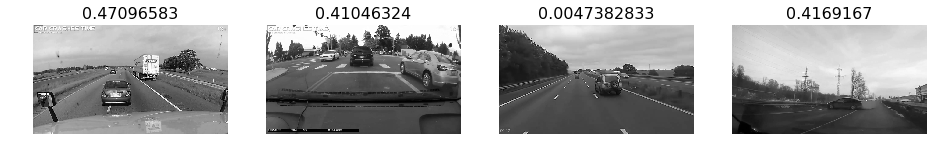

In [51]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

No accidents


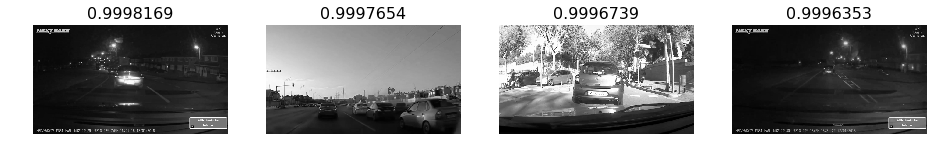

In [52]:
# 3. A few no accident labels at random
most_by_correct_no_accident = np.argsort(np.abs(probs -1))[:4]
plot_val_with_title(most_by_correct_no_accident, "No accidents")

accidents


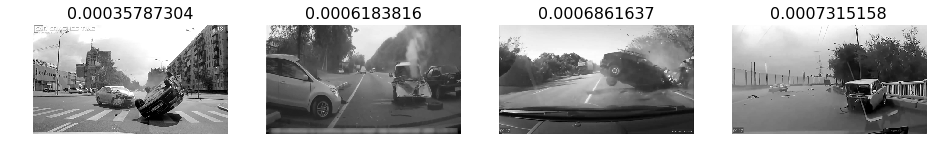

In [53]:
# 4. A few accident labels at random
most_by_correct_accident = np.argsort(np.abs(probs -0))[:4]
plot_val_with_title(most_by_correct_accident, "accidents")

Most uncertain predictions


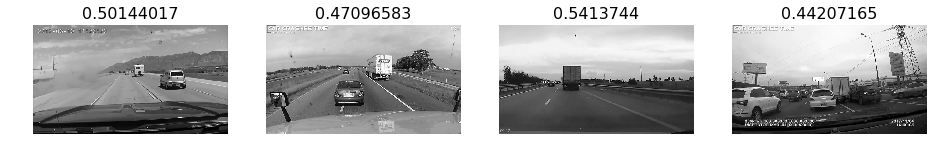

In [54]:
# 5. A few uncertain labels at random
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

In [55]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

/usr/local/lib/python3.6/dist-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)
/usr/local/lib/python3.6/dist-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


In [56]:
lrf = learn.lr_find()

epoch      trn_loss   val_loss   accuracy   
    0      0.876647   32.603803  0.568     



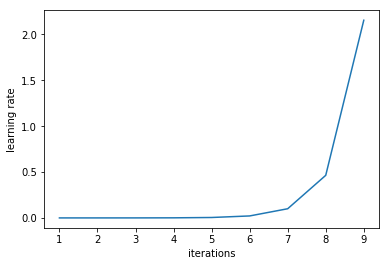

In [57]:
learn.sched.plot_lr()

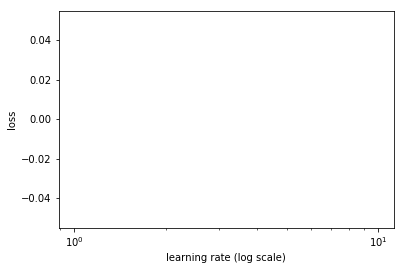

In [58]:
learn.sched.plot()

In [0]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))

In [60]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.9, 0.1, 0.2, 0.8])
binary_loss(acts, preds)

0.164252033486018

In [0]:
###   Add here the name of the model to test
model_name = "carCrash190430-0529_sz299_bs60_ep150"

In [65]:
arch=resnet34
sz = 299                                                                        # Type same size used during model creation. If you donwloaded the model, a new precomputed activations will be generated.
batch_size = 60                                                                 # Type same batch_size used during model creation. If you donwloaded the model, a new precomputed activations will be generated.
PATH = "GDrive/My Drive/CarCrashDetection/Dataset/"
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz), bs=batch_size)     
learn = ConvLearner.pretrained(arch, data, precompute=True)

print ( "Loading model:", model_name,".h5\n")
learn.load(model_name)
print ( "Model loaded")

Loading model: carCrash190430-0529_sz299_bs60_ep150 .h5

Model loaded


/usr/local/lib/python3.6/dist-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)
/usr/local/lib/python3.6/dist-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


(360, 640, 3)


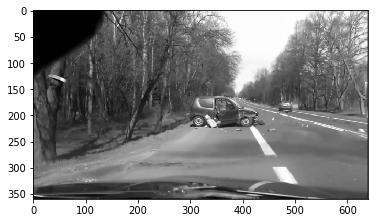

In [71]:
# PATH = "GDrive/My Drive/CarCrashDetection/Dataset/train/no_accident/"
# fn = "frames100.png"

PATH = "GDrive/My Drive/CarCrashDetection/Dataset/train/accident/"
fn = "_flip_frame0001.png"

img = open_image(PATH+fn)

print(img.shape)
plt.imshow(img);

In [72]:
trn_tfms, val_tfms = tfms_from_model(arch,sz)      # get transformations
im = val_tfms (img)

learn.precompute = False                             # We'll pass in a raw image, not activations
preds = learn.predict_array(im[None])
np.argmax(preds)                                   # preds are log probabilities of classes

0

In [73]:
#PATH = "GDrive/My Drive/CarCrashDetection/video_to_check/frames1-noaccident/"
PATH = "GDrive/My Drive/CarCrashDetection/video_to_check/frames4-noaccident/"
#PATH = "GDrive/My Drive/CarCrashDetection/video_to_check/frames5-noaccident/"
#PATH = "GDrive/My Drive/CarCrashDetection/video_to_check/frames9-noaccident/"
#PATH = "GDrive/My Drive/CarCrashDetection/video_to_check/frames10-noaccident/"

#PATH = "GDrive/My Drive/CarCrashDetection/video_to_check/frames2-accident/"
#PATH = "GDrive/My Drive/CarCrashDetection/video_to_check/frames3-accident/"
#PATH = "GDrive/My Drive/CarCrashDetection/video_to_check/frames6-accident/"
#PATH = "GDrive/My Drive/CarCrashDetection/video_to_check/frames7-accident/"
#PATH = "GDrive/My Drive/CarCrashDetection/video_to_check/frames8-accident/"


#filenames_to_check = !ls -tr {PATH} 


filenames_to_check = os.listdir ("GDrive/My Drive/CarCrashDetection/video_to_check/frames4-noaccident/")
number_images = len(filenames_to_check)
print(f"Number of images to check: {number_images}")

Number of images to check: 0


In [74]:
count = 0
list = []
for i in range(number_images):
  fn = filenames_to_check[i]
  img = open_image(PATH+fn)
  trn_tfms, val_tfms = tfms_from_model(arch,sz)      
  im = val_tfms (img)

  learn.precompute=False                             
  preds = learn.predict_array(im[None])
  p = np.argmax(preds)       
  list.append(p)
  count += 1 
  if (count%5):    
    b = round((count*100 / number_images),0)
    sys.stdout.write('\r'+ str(b) + "%")

print ("")
print ("Imagenes procesadas :", count)
print ("Tentative number of no accidents :", list.count(1))
print ("Tentative number of accidents :", list.count(0))


Imagenes procesadas : 0
Tentative number of no accidents : 0
Tentative number of accidents : 0


In [0]:
# normalization setup
seg_lenght = 5      # Segment lenght to analize
steps = 4           # number of steps between length
positivos = 2       # number of '0's in the lenght

In [0]:
list_normalized = []

for i in range(0, (len(list)-(steps+1)), steps):                 # iterates the prediction list according the steps
  norm = 0
  for j in range (seg_lenght):
    posicion = i+j
    norm = norm + list[posicion]

  if (norm>positivos):
    list_normalized.append(1)
  else:
    list_normalized.append(0)

In [77]:
print (list)
print (list_normalized)

[]
[]


In [78]:
count = 0
accidente = 0
for i in range( len (list_normalized)):
  if (count == 3):
    accidente = 1
    break
  else:
    if (list_normalized[i] == 1):
      count == 0
    else:
      count +=1
if (accidente == 0):
  print ("No accident in video")
else:
  print ("Warning, accident")

No accident in video
